In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import glob
from scipy.special import kl_div
import seaborn as sns
import os



Load R3 dataset

In [4]:
df = pd.read_csv("R3_data.csv")
# print(df.head(5))
print(f"num columns : {df.shape[1]}")
print(f"column list : {df.columns}")

num columns : 31
column list : Index(['Unnamed: 0', 'ID', 'Gender', 'Age', 'Handness', 'Race', 'Education',
       'Language', 'ImgID', 'Scan', 'Interval', 'Training', 'Face', 'People',
       'Place', 'Activity', 'B75_Span', 'B75_L', 'B75_R', 'B90_Span', 'B90_L',
       'B90_R', 'B95_Span', 'B95_L', 'B95_R', 'Distinc_Test',
       'Distinc_Encode40', 'Distinc_Encode60', 'Distinc_Encode70', 'A1',
       'Mem_s'],
      dtype='object')


Create csv file for each clients (16 to 62) that will contain 'ImgID' and 'Mem_s'. 

In [5]:
selected_columns = ['ID', 'ImgID', 'Mem_s']
df1 = df[selected_columns]
# Dividing the DataFrame based on the 'ID' into separate DataFrames for each unique ID
dfs_by_id = {id_: df_group for id_, df_group in df1.groupby('ID')}
# Changing the file extension from .jpg to .pt in the 'ImgID' column for each DataFrame
for id_, df_group in dfs_by_id.items():
    df_group['ImgID'] = df_group['ImgID'].str.replace('.jpg', '.pt', regex=False)


Unique Id's from the dataframe df

In [6]:
clients = df['ID'].unique()

print(f"Clients particilated in the Event memory test : {clients}")
print(f"Number of clients : {len(clients)}")

Clients particilated in the Event memory test : [16 17 18 19 22 23 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 41 42 43
 44 45 46 47 48 49 51 52 53 54 55 56 57 60 61 62]
Number of clients : 40


In [7]:
# To demonstrate the change, let's print out the first few rows of each DataFrame again
for id_, df_group in dfs_by_id.items():
    print(f"DataFrame for ID {id_} after changing file extension:")
    print(df_group, "\n")


DataFrame for ID 16 after changing file extension:
     ID                          ImgID  Mem_s
0    16  NEUR16_scan1_img01_day22_S.pt      1
1    16  NEUR16_scan1_img01_day26_D.pt      1
2    16  NEUR16_scan1_img02_day19_S.pt      7
3    16  NEUR16_scan1_img02_day27_D.pt      8
4    16  NEUR16_scan1_img03_day23_S.pt      7
..   ..                            ...    ...
272  16  NEUR16_scan3_img49_day91_D.pt      2
273  16  NEUR16_scan3_img50_day56_D.pt      1
274  16  NEUR16_scan3_img50_day88_S.pt      5
275  16  NEUR16_scan3_img51_day80_D.pt      5
276  16  NEUR16_scan3_img51_day84_S.pt      8

[277 rows x 3 columns] 

DataFrame for ID 17 after changing file extension:
     ID                          ImgID  Mem_s
277  17  NEUR17_scan1_img04_day04_S.pt      4
278  17  NEUR17_scan1_img04_day10_D.pt      3
279  17  NEUR17_scan1_img05_day03_S.pt      9
280  17  NEUR17_scan1_img06_day09_D.pt      9
281  17  NEUR17_scan1_img06_day15_S.pt      3
..   ..                            ...    ..

In [10]:
# To demonstrate, let's print out the first few rows of each DataFrame by ID
for id_, df_group in dfs_by_id.items():
    print(f"DataFrame for ID {id_}:")
    df_group = df_group.drop('ID', axis=1)
    #df_group = df_group.iloc[1:, :]
    print(df_group, "\n")
    file_name = f"Client_ID_{id_}.csv"
    # Saving the DataFrame to a CSV file
    df_group.to_csv("/proj/sourasb-220503/FedMEM/dataset/clients/" + file_name, index=False, header=False)
    print(f"Saved DataFrame for ID {id_} to {file_name}")


DataFrame for ID 16:
                             ImgID  Mem_s
0    NEUR16_scan1_img01_day22_S.pt      1
1    NEUR16_scan1_img01_day26_D.pt      1
2    NEUR16_scan1_img02_day19_S.pt      7
3    NEUR16_scan1_img02_day27_D.pt      8
4    NEUR16_scan1_img03_day23_S.pt      7
..                             ...    ...
272  NEUR16_scan3_img49_day91_D.pt      2
273  NEUR16_scan3_img50_day56_D.pt      1
274  NEUR16_scan3_img50_day88_S.pt      5
275  NEUR16_scan3_img51_day80_D.pt      5
276  NEUR16_scan3_img51_day84_S.pt      8

[277 rows x 2 columns] 

Saved DataFrame for ID 16 to Client_ID_16.csv
DataFrame for ID 17:
                             ImgID  Mem_s
277  NEUR17_scan1_img04_day04_S.pt      4
278  NEUR17_scan1_img04_day10_D.pt      3
279  NEUR17_scan1_img05_day03_S.pt      9
280  NEUR17_scan1_img06_day09_D.pt      9
281  NEUR17_scan1_img06_day15_S.pt      3
..                             ...    ...
542  NEUR17_scan3_img49_day64_S.pt      1
543  NEUR17_scan3_img49_day68_D.pt      5
544 

How many samples that each client has ?

In [6]:
# Display statistics on the sample size of each DataFrame
sample_sizes = {id_: len(df_group) for id_, df_group in dfs_by_id.items()}

#pprint(sample_sizes)

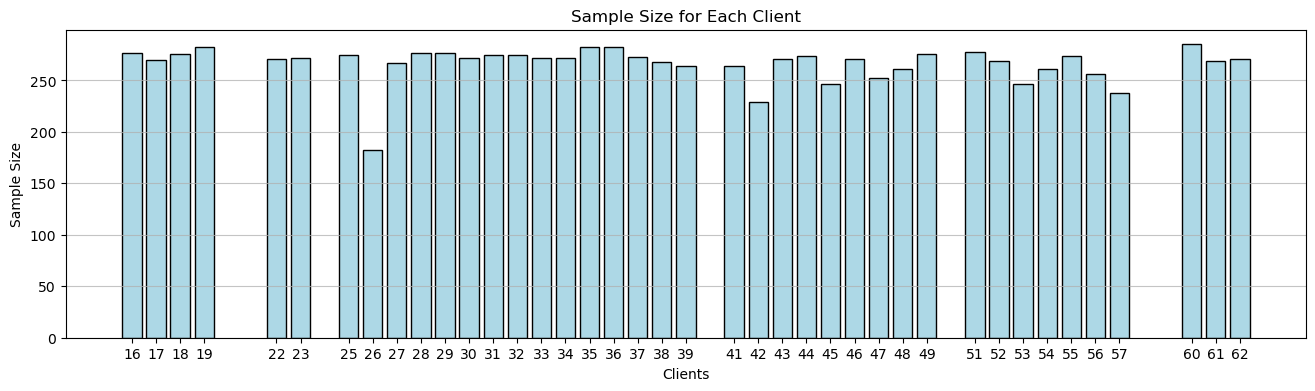

In [8]:
# Plotting the sample sizes for each ID
plt.figure(figsize=(16, 4))
plt.bar(sample_sizes.keys(), sample_sizes.values(), color='lightblue', edgecolor='black')
plt.xlabel('Clients')
plt.ylabel('Sample Size')
plt.title('Sample Size for Each Client')
plt.xticks(list(sample_sizes.keys()))
plt.grid(axis='y', alpha=0.75)

plt.show()

Perform some data analysis on the R3 data



In [9]:
selected_columns = ['ID', 'Age', 'ImgID', 'A1', 'Mem_s']
new_df = df[selected_columns]
print(new_df)

       ID  Age                           ImgID  A1  Mem_s
0      16   71  NEUR16_scan1_img01_day22_S.jpg   1      1
1      16   71  NEUR16_scan1_img01_day26_D.jpg   1      1
2      16   71  NEUR16_scan1_img02_day19_S.jpg   2      7
3      16   71  NEUR16_scan1_img02_day27_D.jpg   2      8
4      16   71  NEUR16_scan1_img03_day23_S.jpg   2      7
...    ..  ...                             ...  ..    ...
10649  62   61  NEUR62_scan3_img53_day77_D.jpg   0      4
10650  62   61  NEUR62_scan3_img54_day68_S.jpg   0      3
10651  62   61  NEUR62_scan3_img54_day68_S.jpg   0      3
10652  62   61  NEUR62_scan3_img54_day71_D.jpg   0      2
10653  62   61  NEUR62_scan3_img54_day71_D.jpg   0      2

[10654 rows x 5 columns]


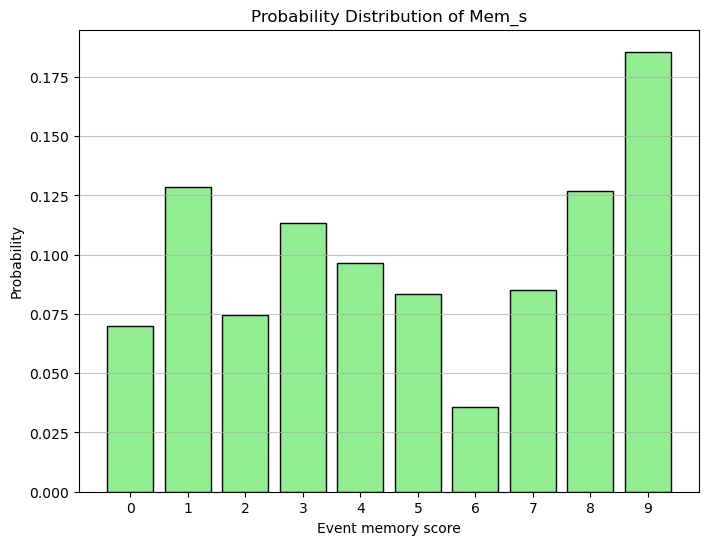

In [18]:
distribution = new_df['Mem_s'].value_counts().sort_index()
# print(distribution)

total = distribution.sum()

probability_distribution = distribution/total

# print(probability_distribution)

# Plotting the histogram of the probability distribution of 'Mem_s' values

plt.figure(figsize=(8, 6))
# Since we're dealing with a probability distribution, we use the index for bins and values for heights
plt.bar(probability_distribution.index, probability_distribution.values, color='lightgreen', edgecolor='black')
plt.title('Probability Distribution of Mem_s')
plt.xlabel('Event memory score')
plt.ylabel('Probability')
plt.xticks(probability_distribution.index)
plt.grid(axis='y', alpha=0.75)

plt.show()

In [21]:
# Dividing the DataFrame based on the 'ID' into separate DataFrames for each unique ID
dfs_by_id = {id_: df_group for id_, df_group in new_df.groupby('ID')}

# Changing the file extension from .jpg to .pt in the 'ImgID' column for each DataFrame
for id_, df_group in dfs_by_id.items():
    df_group['ImgID'] = df_group['ImgID'].str.replace('.jpg', '.pt', regex=False)

# To demonstrate the change, let's print out the first few rows of each DataFrame again
# for id_, df_group in dfs_by_id.items():
#    print(f"DataFrame for ID {id_} after changing file extension:")
    # print(df_group, "\n")


# To demonstrate, let's print out the first few rows of each DataFrame by ID
# for id_, df_group in dfs_by_id.items():
    # print(f"DataFrame for ID {id_}:")
    # print(df_group, "\n")
    # file_name = f"Client_ID_{id_}.csv"
    # Saving the DataFrame to a CSV file
    # df_group.to_csv("/proj/sourasb-220503/FedMEM/dataset/clients/" + file_name, index=False)
   # print(f"Saved DataFrame for ID {id_} to {file_name}")


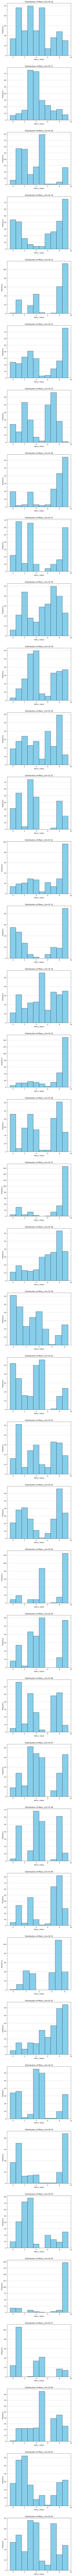

In [18]:
# Plotting the distribution of 'Mem_s' for each divided DataFrame
fig, axes = plt.subplots(nrows=len(dfs_by_id), ncols=1, figsize=(8, 6*len(dfs_by_id)))
fig.tight_layout(pad=6.0)

if len(dfs_by_id) == 1:  # Adjusting for the case when there's only one subplot (avoiding indexing error)
    axes = [axes]

for ax, (id_, df_group) in zip(axes, dfs_by_id.items()):
    ax.hist(df_group['Mem_s'], bins=range(min(df_group['Mem_s']), max(df_group['Mem_s']) + 2), align='left', color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of Mem_s for ID {id_}')
    ax.set_xlabel('Mem_s Value')
    ax.set_ylabel('Frequency')
    ax.grid(axis='y', alpha=0.75)

plt.show()

KL divergence between clients

In [47]:
 # Assuming you have a list of file paths
folder_paths = '/proj/sourasb-220503/FedMEM/dataset/clients/*.csv'
# print(folder_paths)
file_paths = glob.glob(folder_paths)
print(file_paths)
# Read each CSV into a DataFrame and store in a list
dfs = [pd.read_csv(path) for path in file_paths]
# dfs

# Extract only the filenames
filenames = [os.path.basename(file_path) for file_path in file_paths]
print(filenames)

['/proj/sourasb-220503/FedMEM/dataset/clients/Client_ID_62.csv', '/proj/sourasb-220503/FedMEM/dataset/clients/Client_ID_17.csv', '/proj/sourasb-220503/FedMEM/dataset/clients/Client_ID_22.csv', '/proj/sourasb-220503/FedMEM/dataset/clients/Client_ID_28.csv', '/proj/sourasb-220503/FedMEM/dataset/clients/Client_ID_26.csv', '/proj/sourasb-220503/FedMEM/dataset/clients/Client_ID_46.csv', '/proj/sourasb-220503/FedMEM/dataset/clients/Client_ID_36.csv', '/proj/sourasb-220503/FedMEM/dataset/clients/Client_ID_31.csv', '/proj/sourasb-220503/FedMEM/dataset/clients/Client_ID_34.csv', '/proj/sourasb-220503/FedMEM/dataset/clients/Client_ID_43.csv', '/proj/sourasb-220503/FedMEM/dataset/clients/Client_ID_54.csv', '/proj/sourasb-220503/FedMEM/dataset/clients/Client_ID_18.csv', '/proj/sourasb-220503/FedMEM/dataset/clients/Client_ID_30.csv', '/proj/sourasb-220503/FedMEM/dataset/clients/Client_ID_61.csv', '/proj/sourasb-220503/FedMEM/dataset/clients/Client_ID_55.csv', '/proj/sourasb-220503/FedMEM/dataset/cl

In [37]:
# Calculate the normalized class distribution for each DataFrame
class_distributions = [df['Mem_s'].value_counts(normalize=True) for df in dfs]
# class_distributions

In [39]:
# Ensure all distributions cover the same set of classes
all_classes = sorted(set.union(*(set(dist.index) for dist in class_distributions)))
class_distributions = [dist.reindex(all_classes, fill_value=0) for dist in class_distributions]

# Function to compute KL Divergence, handling zeros by adding a small constant
def compute_kl_div(p, q):
    epsilon = 1e-10
    p = np.array(p) + epsilon
    q = np.array(q) + epsilon
    return kl_div(p, q).sum()

# Compute KL Divergence for each pair of distributions
kl_matrix = np.zeros((len(dfs), len(dfs)))

for i in range(len(dfs)):
    for j in range(len(dfs)):
        kl_matrix[i, j] = compute_kl_div(class_distributions[i], class_distributions[j])

In [51]:
# Display the similarity matrix
kl_matrix_df = pd.DataFrame(kl_matrix, index=filenames, columns=filenames)
kl_matrix_df


,Client_ID_62.csv,Client_ID_17.csv,Client_ID_22.csv,Client_ID_28.csv,Client_ID_26.csv,Client_ID_46.csv,Client_ID_36.csv,Client_ID_31.csv,Client_ID_34.csv,Client_ID_43.csv,...,Client_ID_44.csv,Client_ID_27.csv,Client_ID_35.csv,Client_ID_48.csv,Client_ID_39.csv,Client_ID_38.csv,Client_ID_56.csv,Client_ID_29.csv,Client_ID_45.csv,Client_ID_16.csv
Client_ID_62.csv,0.000000,0.359291,2.688866,0.407361,0.759474,0.598604,0.326167,1.437043,0.262237,0.352857,...,2.877009,0.975176,0.693055,2.442519,1.937545,0.464904,2.865609,0.225484,4.021596,0.205138
Client_ID_17.csv,0.327304,0.000000,3.615522,0.606880,1.289075,2.136200,0.725398,4.107018,0.443668,0.988150,...,3.868742,2.890528,1.026376,3.157389,1.073173,0.711961,4.538135,0.270077,2.919780,0.303869
Client_ID_22.csv,0.841557,1.317195,0.000000,0.970359,0.640995,0.997530,0.909197,0.767567,0.690430,0.642290,...,0.608441,0.728641,0.256108,0.798805,9.302255,0.673945,0.689323,0.550485,0.572240,1.003219
Client_ID_28.csv,0.421176,0.511568,6.504490,0.000000,0.831279,2.714606,0.643153,5.284593,0.161739,0.446891,...,6.426460,2.760463,0.689317,6.137849,2.322032,0.128566,6.685242,0.386100,6.558306,0.325363
Client_ID_26.csv,0.646676,1.234553,1.382913,0.672883,0.000000,1.204735,0.368756,1.363229,0.539234,0.362483,...,1.510493,0.718793,0.272117,1.935432,7.879126,0.402899,1.229504,0.581333,3.478641,0.862082
Client_ID_46.csv,0.272349,0.688287,1.739324,0.483375,0.979715,0.000000,0.627234,0.724295,0.410983,0.294758,...,2.335332,0.639878,0.824383,1.500139,1.030587,0.544188,2.292466,0.360737,4.156299,0.325472
Client_ID_36.csv,0.280605,0.646452,3.336622,0.491331,0.369040,0.589618,0.000000,0.865558,0.469283,0.215184,...,3.528063,0.701698,0.699162,3.191167,2.001948,0.460950,3.373367,0.410910,3.848767,0.448310
Client_ID_31.csv,0.315142,0.584409,0.972737,0.912304,1.031863,0.346428,0.599041,0.000000,0.634547,0.476745,...,1.502455,0.309528,0.928303,0.882009,1.674639,0.855875,1.624154,0.507124,0.625955,0.381209
Client_ID_34.csv,0.336090,0.422289,3.158315,0.149456,0.852306,1.579254,0.821728,5.581003,0.000000,0.737591,...,2.709320,4.427471,0.539708,2.560791,2.945969,0.127510,3.465059,0.401727,3.653456,0.131974
Client_ID_43.csv,0.356254,0.786209,4.120230,0.273521,0.553075,0.795556,0.304896,1.114062,0.332762,0.000000,...,4.473650,0.457804,0.489325,4.162892,2.851233,0.291235,4.387955,0.361159,3.219447,0.354325


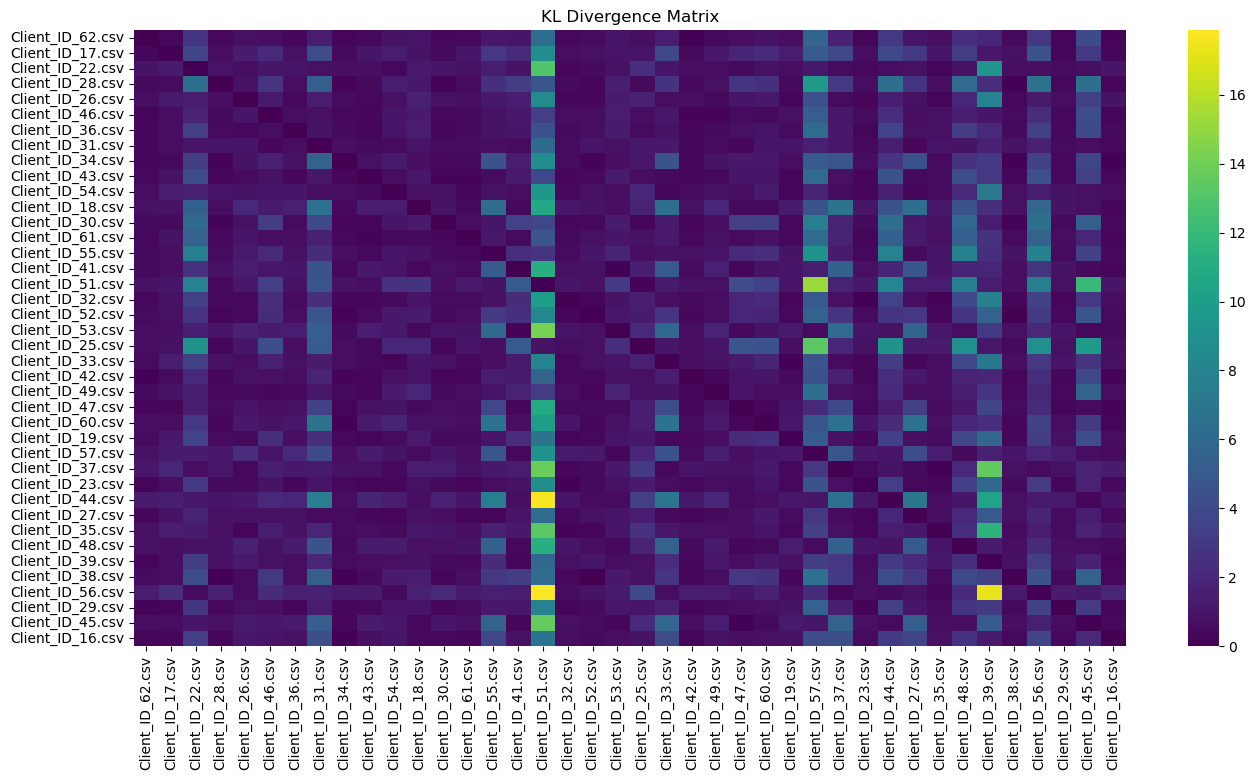

In [56]:

plt.figure(figsize=(16, 8))
sns.heatmap(kl_matrix_df, annot=False, cmap='viridis')
plt.title('KL Divergence Matrix')
plt.show()

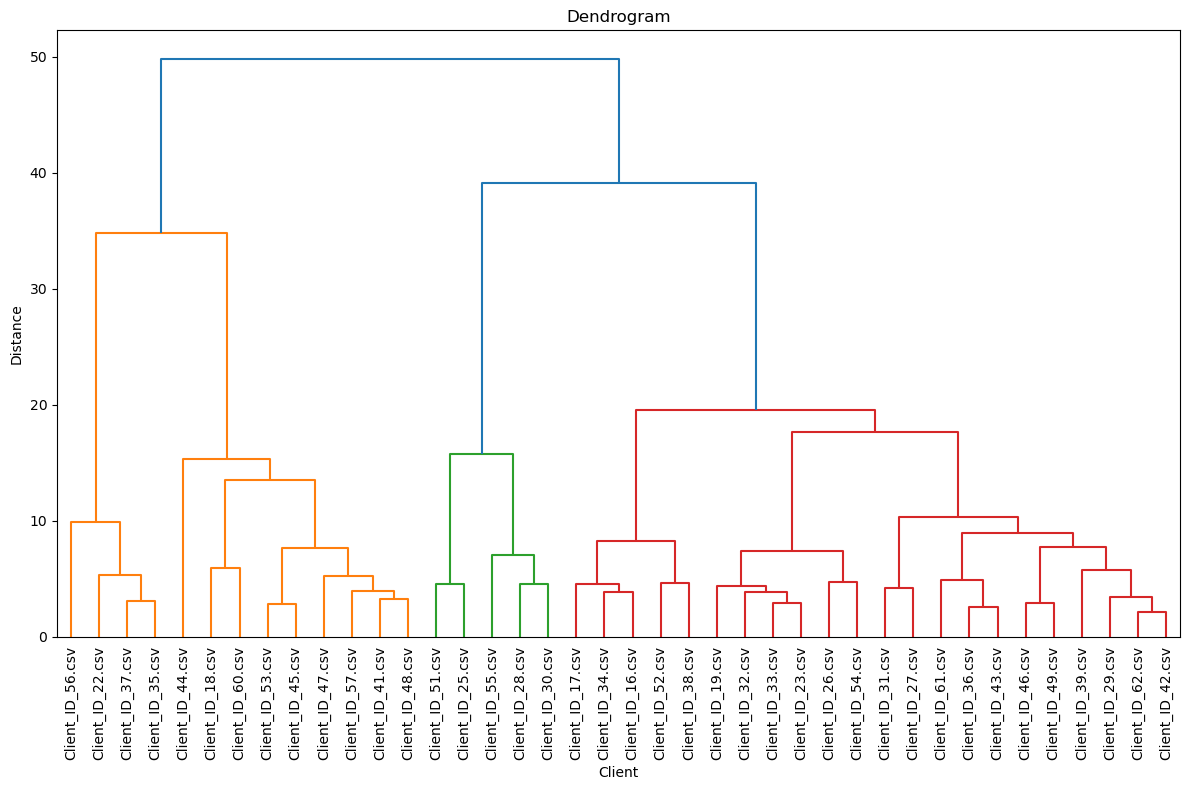

In [58]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix using 'ward' linkage method to minimize variance within clusters
Z = linkage(kl_matrix_df, method='ward')

# Plot the dendrogram to visualize the cluster formation
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=kl_matrix_df.index, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram")
plt.xlabel("Client")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

Visualizing clients clusters using spectral clustering

[2 2 0 2 0 2 2 0 2 2 0 1 2 2 2 1 2 0 2 1 2 0 2 2 1 1 0 1 0 0 1 0 0 1 2 2 0
 2 1 2]


/home/x_souba/anaconda3/envs/personalized_fl/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:248: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


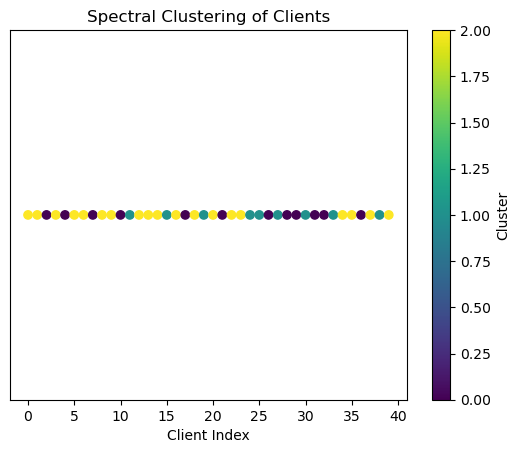

In [63]:
from sklearn.cluster import SpectralClustering

# Convert the KL divergence matrix to a similarity matrix
similarity_matrix = np.exp(-kl_matrix_df)
np.fill_diagonal(similarity_matrix.values, 1)

# Choose the number of clusters
n_clusters = 3  # Adjust based on your specific needs

# Apply Spectral Clustering
sc = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', n_init=100, assign_labels='discretize')
clusters = sc.fit_predict(similarity_matrix)

print(clusters)

# Print cluster assignments
# for i, cluster in enumerate(clusters):
#    print(f"Client {kl_matrix_df.index[i]} assigned to cluster: {cluster}")

# Assuming you have a way to represent each client in 2D (e.g., via MDS or t-SNE on the original distance matrix)
# Here, just an example placeholder
x = np.arange(len(clusters))  # Placeholder for actual 2D representations

plt.scatter(x, np.zeros_like(x), c=clusters, cmap='viridis')
plt.title('Spectral Clustering of Clients')
plt.xlabel('Client Index')
plt.yticks([])
plt.colorbar(label='Cluster')
plt.show()


t-sne